# Intro To DATA PROJECTS

Links

http://www.data.gov

http://aws.amazon.com/public-data-sets/

http://www.google.com/publicdata/directory

## Primera parte un estudio por encima de los datos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
%matplotlib inline


## Cargamos los datos del titanic
df_titanic = pd.read_csv('train.csv')

df_titanic.head(n=9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### A partir de esta información podemos plantear una serie de cuestiones:
 1. ¿Quiénes fueron los pasajeros del Titanic? (edad, género, clase...)
 2. ¿Qué habitación eran los pasajeros, y cómo se relaciona a su clase?
 3. ¿De dónde eran los pasajeros?
 4. ¿Quiénes estaban solos o con familiares?
 5. ¿Qué factores ayudaron a algunos sobrevivir el hundimiento?

Text(0, 0.5, 'Frecuencia')

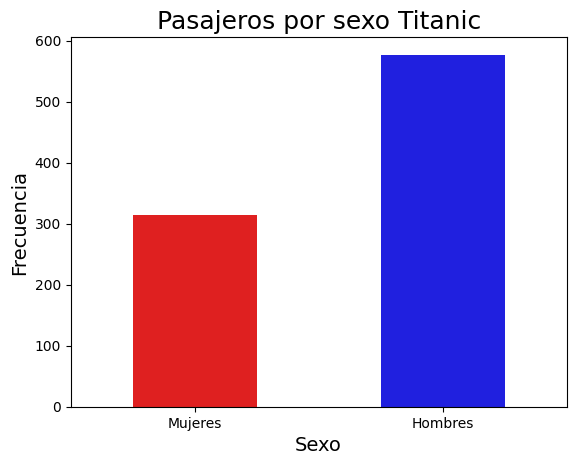

In [45]:
df_sexo = df_titanic.groupby('Sex').size().reset_index(name='count')
df_sexo['Sex'] = df_sexo['Sex'].replace(['female', 'male'],
                                        ['Mujeres', 'Hombres'])

sns.barplot(data=df_sexo, 
            x='Sex', y='count',
            palette=['red', 'blue'],
            width=.5)
plt.title("Pasajeros por sexo Titanic", fontsize=18)
plt.xlabel("Sexo", fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)


Text(0, 0.5, 'Frecuencia')

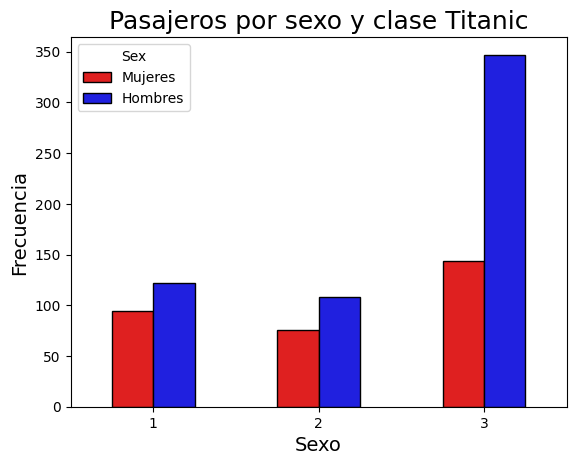

In [51]:
df_sexo = df_titanic.groupby(['Sex','Pclass']).size().reset_index(name='count')
df_sexo['Sex'] = df_sexo['Sex'].replace(['female', 'male'],
                                        ['Mujeres', 'Hombres'])

sns.barplot(data=df_sexo, 
            x='Pclass', y='count',
            hue='Sex',
            width=.5,
            palette=['red', 'blue'],
            edgecolor='black')
plt.title("Pasajeros por sexo y clase Titanic", fontsize=18)
plt.xlabel("Sexo", fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

In [56]:
## Función para sacar a los niños
def male_female_child(passenger):
    age, sex= passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [57]:
df_titanic['person'] = df_titanic[['Age', 'Sex']].apply(male_female_child, axis=1)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


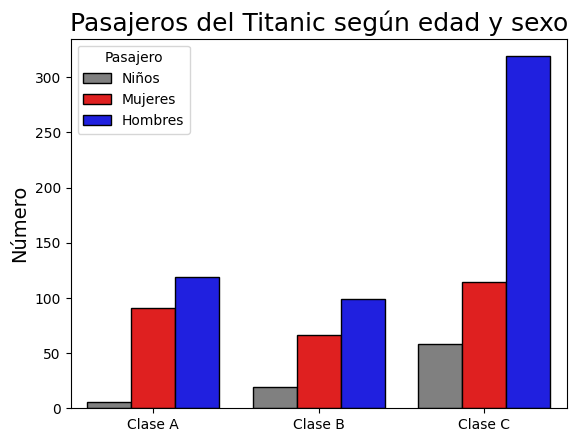

In [75]:
df_personas = df_titanic.groupby(['person', 'Pclass']).size().reset_index(name='n')
df_personas['person'] = df_personas['person'].replace(['child', 'female', 'male'],
                                                      ['Niños', 'Mujeres', 'Hombres'])
df_personas['Pclass'] = df_personas['Pclass'].replace([1,2,3],
                                                       ['Clase A', 'Clase B', 'Clase C'])

sns.barplot(data=df_personas,
            x='Pclass', y='n',
            hue='person',
            palette=['gray', 'red', 'blue'],
            edgecolor='black')
plt.title('Pasajeros del Titanic según edad y sexo', fontsize=18)
plt.xlabel('')
plt.ylabel('Número', fontsize=14)
plt.legend(title='Pasajero')


Text(0, 0.5, 'Frecuencia')

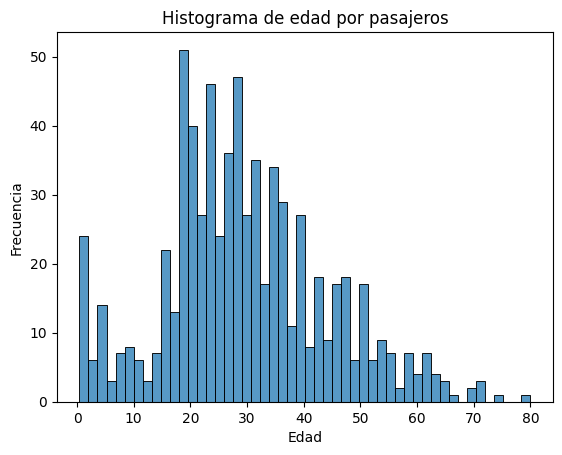

In [81]:
sns.histplot(data=df_titanic,
             x='Age', edgecolor='black',
             bins=50)
plt.title("Histograma de edad por pasajeros")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

In [83]:
## Edad prmedio
df_titanic['Age'].mean()

29.69911764705882

In [85]:
## LOLOLOL una forma más fácil de hacer lo que estaba haciendo xd
df_titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

## Segunada parte

C:\Users\jcge9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\jcge9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


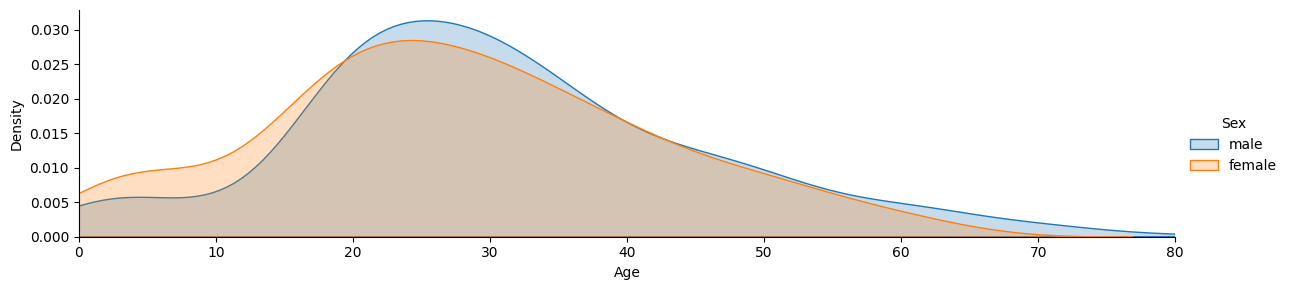

In [87]:
fig = sns.FacetGrid(df_titanic, hue='Sex', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = df_titanic['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

C:\Users\jcge9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\jcge9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\jcge9\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

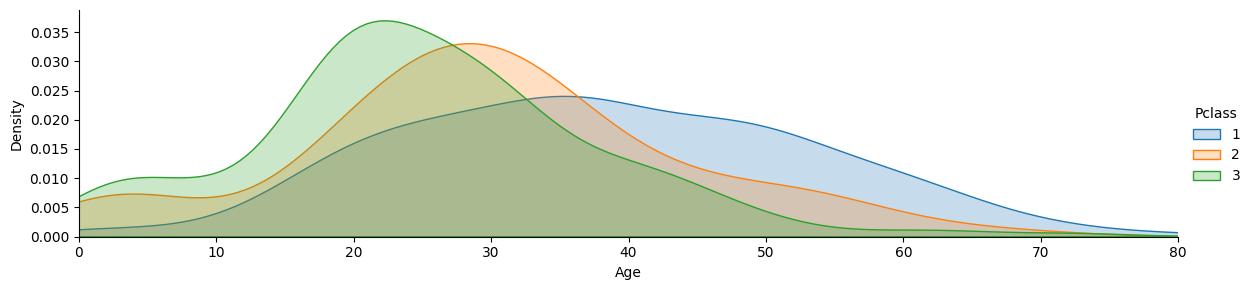

In [89]:
fig = sns.FacetGrid(df_titanic, hue='Pclass', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)

oldest = df_titanic['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [90]:
deck = df_titanic['Cabin'].dropna()

In [91]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

<Axes: xlabel='Cabin', ylabel='n'>

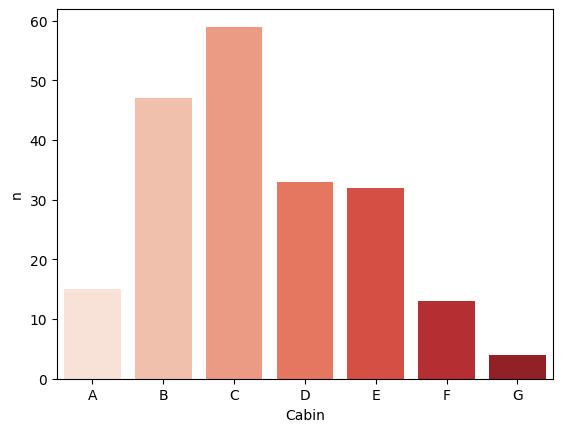

In [112]:
levels =[]

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

df_cabin = cabin_df.groupby('Cabin').size().reset_index(name='n')
## Hay que eshacerse de T
df_cabin = df_cabin[df_cabin['Cabin'] != 'T']

sns.barplot(data=df_cabin, 
            x='Cabin', 
            y='n',
            palette='Reds')

In [113]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


<Axes: xlabel='Embarked', ylabel='n'>

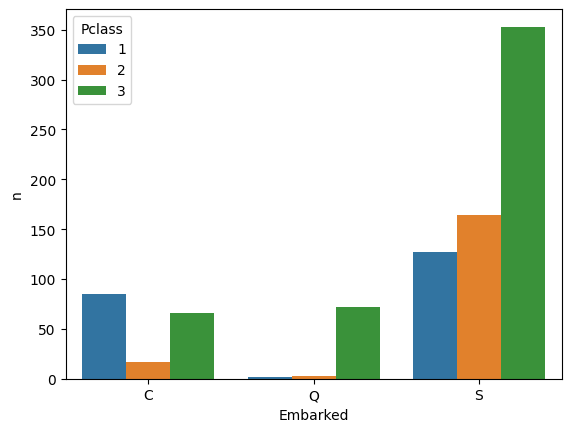

In [118]:
embarcados_clase = df_titanic.groupby(['Embarked', 'Pclass']).size().reset_index(name='n')
sns.barplot(data=embarcados_clase, 
            x='Embarked',
            y='n', 
            hue='Pclass',
            order=['C', 'Q', 'S'])